In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./cli_train.tsv',sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20010 entries, 0 to 20009
Data columns (total 11 columns):
일자             20010 non-null int64
time           20010 non-null object
식사내용           20010 non-null object
매출일자           20010 non-null float64
수량             20010 non-null float64
일시             20010 non-null object
평균기온(°C)       20010 non-null float64
최저기온(°C)       20010 non-null float64
최고기온(°C)       20010 non-null float64
강수 계속시간(hr)    20010 non-null float64
일강수량(mm)       20010 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.7+ MB


In [3]:
df['year'] = (df['일자']/10000).astype(int)
df['month'] = (df['일자'] % 10000 /100).astype(int)
df['day'] = (df['일자'] % 100).astype(int)

In [4]:
df['weekday'] = pd.to_datetime(df['일자'], format='%Y%m%d').dt.dayofweek
df.drop(['일자'],axis=1,inplace=True)

In [5]:
df['year'] = (df['year']-min(df['year'])) / (max(df['year']) - min(df['year']))
df['month_sin'] = [np.sin(x*2*np.pi/12) for x in df['month']]
df['month_cos'] = [np.cos(x*2*np.pi/12) for x in df['month']]
df['day_sin'] = [np.sin(x*2*np.pi/31) for x in df['day']]
df['day_cos'] = [np.cos(x*2*np.pi/31) for x in df['day']]
df['weekday_sin'] = [np.sin(x*2*np.pi/7) for x in df['weekday']]
df['weekday_cos'] = [np.cos(x*2*np.pi/7) for x in df['weekday']]
df.drop(['month','day','weekday'], axis=1,inplace=True)

In [6]:
df = df.join(pd.get_dummies(df['time'], prefix='식사명'))
df.drop(['time'],axis=1, inplace=True)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
def tokenize(text):
    return text.split(',')
vectorizer = CountVectorizer(tokenizer=tokenize)
bow = vectorizer.fit_transform(df['식사내용']).toarray()
df = df.join(pd.DataFrame(bow,columns=vectorizer.get_feature_names()))
df.drop(['식사내용'], axis=1, inplace=True)
df.head()

,매출일자,수량,일시,평균기온(°C),최저기온(°C),최고기온(°C),강수 계속시간(hr),일강수량(mm),year,month_sin,...,휘),흑미밥,흑미밥(현장),흑임자밥,흑임자죽,흑콩견과류조림,흑콩밥,흑콩조림,흰죽,흰콩곤약조림
0,20030301.0,37.472924,2003-03-01,6.1,4.5,8.0,9.25,8.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,20030301.0,19.566787,2003-03-01,6.1,4.5,8.0,9.25,8.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,20030301.0,31.191336,2003-03-01,6.1,4.5,8.0,9.25,8.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,20030302.0,36.101083,2003-03-02,9.5,3.7,15.1,0.00,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,20030302.0,21.949458,2003-03-02,9.5,3.7,15.1,0.00,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.drop(['매출일자','일시'],axis=1,inplace=True)

In [9]:
df.drop(['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '강수 계속시간(hr)', '일강수량(mm)'],axis=1,inplace=True)

In [10]:
df.head()

,수량,year,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,식사명_아침,식사명_저녁,...,휘),흑미밥,흑미밥(현장),흑임자밥,흑임자죽,흑콩견과류조림,흑콩밥,흑콩조림,흰죽,흰콩곤약조림
0,37.472924,0.0,1.0,6.123234e-17,0.201299,0.979530,-0.974928,-0.222521,1,0,...,0,0,0,0,0,0,0,0,0,0
1,19.566787,0.0,1.0,6.123234e-17,0.201299,0.979530,-0.974928,-0.222521,0,1,...,0,0,0,0,0,0,0,0,0,0
2,31.191336,0.0,1.0,6.123234e-17,0.201299,0.979530,-0.974928,-0.222521,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.101083,0.0,1.0,6.123234e-17,0.394356,0.918958,-0.781831,0.623490,1,0,...,0,0,0,0,0,0,0,0,0,0
4,21.949458,0.0,1.0,6.123234e-17,0.394356,0.918958,-0.781831,0.623490,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
train_df, dev_df = train_test_split(df,test_size=0.2, random_state=10)
print(train_df.shape)
print(dev_df.shape)

(16008, 1887)
(4002, 1887)


In [12]:
train_y = train_df['수량']
train_x = train_df.drop(['수량'],axis=1)
dev_y = dev_df['수량']
dev_x = dev_df.drop(['수량'],axis=1)

In [13]:
from sklearn.metrics import mean_squared_error
import math

def train_and_predict(model,train_x,train_y,dev_x):
    model.fit(train_x, train_y)
    return model.predict(dev_x)

def evaluate(predict_y, actual_y):
    rmse = math.sqrt(mean_squared_error(actual_y, predict_y))
    print('RMSE:', round(np.mean(rmse), 4))

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=10)

In [15]:
pred = train_and_predict(model,train_x, train_y, dev_x)
evaluate(pred,dev_y)

RMSE: 4.8305


In [22]:
from sklearn.model_selection import GridSearchCV

In [20]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, 
                        learning_rate=0.05, max_depth=10,
                        seed=10)

In [28]:
parameters = {'max_depth':(3,6,10),'learning_rate':(0.3, 0.1,0.05 ,0.01)}

In [29]:
clf = GridSearchCV(model,parameters,verbose=1)

In [30]:
%%time
clf.fit(train_x,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10, silent=True,
       subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': (3, 6, 10), 'learning_rate': (0.3, 0.1, 0.05, 0.01)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 10}

In [34]:
%%time
model = xgb.XGBRegressor(n_estimators=100, 
                        learning_rate=0.1, max_depth=10,
                        seed=10)
pred = train_and_predict(model, train_x,train_y,dev_x)
evaluate(pred,dev_y)

RMSE: 4.7967
CPU times: user 2min 2s, sys: 1.42 s, total: 2min 3s
Wall time: 2min 3s


In [18]:
import matplotlib.font_manager as font_manager

font_list = font_manager.findSystemFonts(fontpaths=None)
print(len(font_list))
font_list

0


[]

In [33]:
import matplotlib.pyplot as plt
import matplotlib


plt.rcParams['figure.figsize'] = (16,4)
plt.rcParams['font.family'] = 'NanumGothic'

%matplotlib inline

In [14]:
xgb.plot_importance(model,max_num_features=10)

NameError: name 'xgb' is not defined

### nn model processing

In [16]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.regularizers import l2

Using TensorFlow backend.


In [17]:
print(train_x.shape, train_y.shape)
print(dev_x.shape, dev_y.shape)

(16008, 1886) (16008,)
(4002, 1886) (4002,)


### LSA

In [18]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [19]:
svd = TruncatedSVD(n_components=200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd,normalizer)

In [20]:
lsa.fit(pd.concat([train_x, dev_x],axis=0))
train_x = lsa.transform(train_x)
dev_x = lsa.transform(dev_x)

exp_var = svd.explained_variance_ratio_.sum()
print(train_x.shape, exp_var)

(16008, 200) 0.802281088022


### PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)

In [18]:
pca.fit(pd.concat([train_x, dev_x],axis=0))
train_x = pca.transform(train_x)
dev_x = pca.transform(dev_x)

In [19]:
pca.explained_variance_ratio_.sum()

0.86007041388919836

### dnn

In [21]:
#train_X = train_x.iloc[:,:7]
#dev_X = dev_x.iloc[:,:7]

train_X = train_x
dev_X = dev_x

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler

In [23]:
minmax_x = MinMaxScaler(feature_range=(0,1))
minmax_y = MinMaxScaler(feature_range=(0,1))

In [24]:
#mtrain_X = minmax_x.fit_transform(train_x.values)
mtrain_X = train_X#.values
mtrain_y = minmax_y.fit_transform(train_y.reshape(-1,1))#.values)

/app/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
#mtest_X = minmax_x.transform(dev_x.values)
mtest_X = dev_X#.values
mtest_y = minmax_y.transform(dev_y.reshape(-1,1))#.values.reshape(-1,1))

/app/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
print(mtrain_X.shape, mtrain_y.shape)
print(mtest_X.shape, mtest_y.shape)

(16008, 200) (16008, 1)
(4002, 200) (4002, 1)


In [27]:
# define base model
def baseline_model():
    visible = Input(shape=(200,))
    #hidden1 = Dense(1024, activation='relu')(visible)
    #hidden1 = BatchNormalization()(hidden1)
    #hidden1 = Dropout(0.8)(hidden1)
    #hidden1 = Dense(512, activation='relu')(hidden1)    
    #hidden1 = BatchNormalization()(visible)
    #hidden1 = Dropout(0.8)(hidden1)
    #hidden1 = Dense(256, activation='relu')(visible)
    #hidden1 = BatchNormalization()(hidden1)
    #hidden1 = Dropout(0.8)(hidden1)
    hidden1 = Dense(128, activation='relu')(visible)
    hidden1 = Dropout(0.8)(hidden1)
    #hidden1 = BatchNormalization()(hidden1)
    hidden1 = Dense(64, activation='relu')(hidden1)
    hidden1 = Dropout(0.8)(hidden1)
    #hidden1 = BatchNormalization()(hidden1)
    hidden1 = Dense(32, activation='relu')(hidden1)
    hidden1 = Dropout(0.8)(hidden1)
    #hidden1 = BatchNormalization()(hidden1)
    hidden1 = Dense(16, activation='relu')(hidden1)
    #hidden1 = BatchNormalization()(hidden1)
    output = Dense(1, activation='tanh')(hidden1)
    adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    #sgd = SGD(lr=0.001, decay=0, momentum=0.9, nesterov=True)
    
    
    model = Model(inputs=visible, outputs=output)
    #model = multi_gpu_model(model,gpus=2)
    model.compile(optimizer=adam,loss='mean_squared_error',)
    model.summary()
    
    return model

In [28]:
dnn = baseline_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               25728     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
__________

In [36]:
%%time
test_rmse_list = []
train_rmse_list = []
for i in range(50):
    dnn.fit(x=mtrain_X,y=mtrain_y,batch_size=1000,epochs=50,verbose=0)
#    print(mtrain_X.shape,mtest_X.shape)
#    train_rmse = math.sqrt(np.mean(dnn.predict(mtrain_X).reshape(-1,) - mtrain_y) ** 2)
#   test_rmse = math.sqrt(np.mean(dnn.predict(mtest_X) - mtest_y) ** 2)
    train_rmse = math.sqrt(np.mean(( minmax_y.inverse_transform(dnn.predict(mtrain_X).reshape(-1,1)) - minmax_y.inverse_transform(mtrain_y)) ** 2))
    test_rmse = math.sqrt(np.mean((minmax_y.inverse_transform(dnn.predict(mtest_X).reshape(-1,1)) -  minmax_y.inverse_transform(mtest_y)) ** 2))
    test_rmse_list.append(test_rmse)
    train_rmse_list.append(train_rmse)
    print(i+1,']','*'*50)
    print("train_RMSE: %.2f"%train_rmse )
    print("test_RMSE: %.2f"% test_rmse)

1 ] **************************************************
train_RMSE: 6.88
test_RMSE: 7.60
2 ] **************************************************
train_RMSE: 7.11
test_RMSE: 7.78
3 ] **************************************************
train_RMSE: 7.03
test_RMSE: 7.69
4 ] **************************************************
train_RMSE: 6.85
test_RMSE: 7.56
5 ] **************************************************
train_RMSE: 6.97
test_RMSE: 7.67
6 ] **************************************************
train_RMSE: 6.50
test_RMSE: 7.33
7 ] **************************************************
train_RMSE: 7.05
test_RMSE: 7.72
8 ] **************************************************
train_RMSE: 6.53
test_RMSE: 7.36
9 ] **************************************************
train_RMSE: 7.41
test_RMSE: 8.01
10 ] **************************************************
train_RMSE: 7.08
test_RMSE: 7.76
11 ] **************************************************
train_RMSE: 6.01
test_RMSE: 6.96
12 ] *************************

/app/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


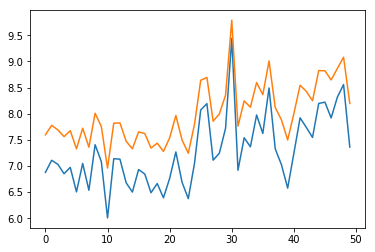

In [37]:
plt.plot(train_rmse_list)
plt.plot(test_rmse_list)

In [35]:
pred = dnn.predict(mtest_X)

In [32]:

plt.rcParams["figure.figsize"] = (20,3)
index = 100

plt.plot(pred[index:index+100])
plt.plot(mtest_y[index:index+100])